Dataset orientado a calcular caracteres cirílicos mongoles escritos a mano en base a los pixeles  en tono gris y blanco


In [1]:
#Nombre: Barja Coragua Erlinda
#carrera: Ing.de Sistemas
# REPOSITORIO https://github.com/Erlinda-Barja/INTELIGENCIA-ARTIFICIAL
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [4]:
!ls
%mkdir data
!ls

data  drive  entrenamiento.csv	prueva.csv  sample_data
mkdir: cannot create directory ‘data’: File exists
data  drive  entrenamiento.csv	prueva.csv  sample_data


**Carga de datos del dataset con Pandas y division de datos de entrenamiento y prueba en un 80% y 20%  y eleccion de la Y predicha**

In [24]:
data = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial/HMCC all.csv')

# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.to_csv("entrenamiento.csv", index=False)
test_data.to_csv("prueba.csv", index=False)
data = pd.read_csv('/content/entrenamiento.csv')
data = data.to_numpy()
X, y= data [:, 1:],data[:, 0]
y[y == 24] = 0
input_layer_size  = 784
num_labels = 24
m = y.size
print(X.shape)
print(y.shape)

(293692, 784)
(293692,)


In [6]:
data.shape

(293692, 785)

In [7]:
def displayData(X, example_width=None, figsize=(10, 10)):

    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

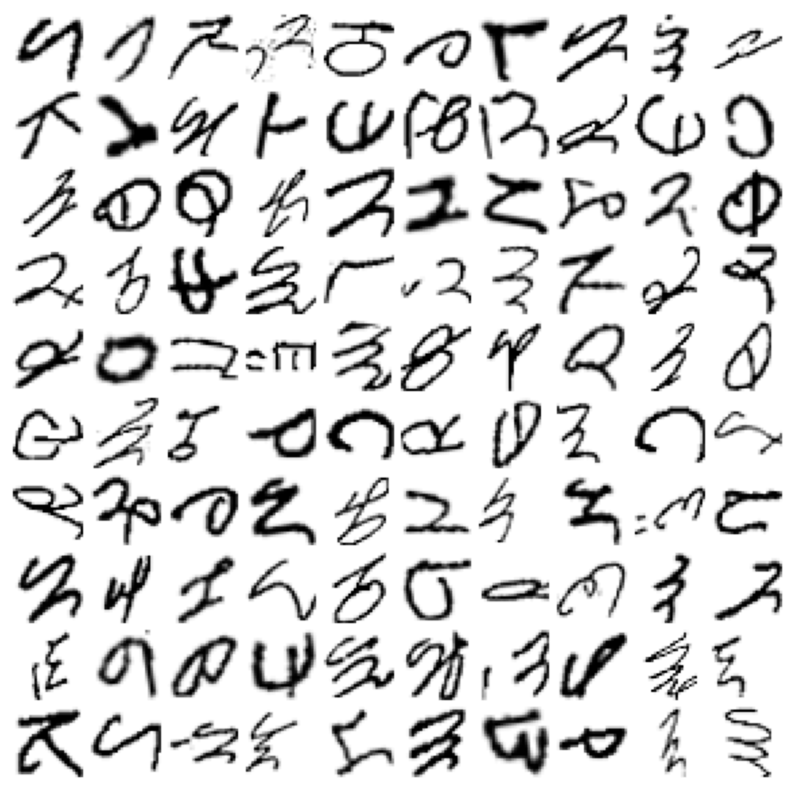

In [8]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [9]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    clip_z=np.clip(z,-7000,7000)
    return 1.0 / (1.0 + np.exp(-clip_z))

In [10]:
def lrCostFunction(theta, X, y, lambda_):

    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

In [11]:
def oneVsAll(X, y, num_labels, lambda_):

    # algunas variables utiles
    m, n = X.shape

    # print(m, n)
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        # print(res)
        all_theta[c] = res.x

    return all_theta

In [12]:
# usamos un valor de landa se puede modificar
lambda_ = 0.002
all_theta = oneVsAll(X, y, num_labels, lambda_)

<ipython-input-9-f78422614ea9>:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-clip_z))
<ipython-input-10-c7c52731ce29>:18: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-9-f78422614ea9>:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-clip_z))
<ipython-input-10-c7c52731ce29>:18: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-9-f78422614ea9>:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-clip_z))
<ipython-input-10-c7c52731ce29>:18: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-10-c7c52731ce29>:18

In [13]:
print(all_theta.shape)
print(all_theta[0])

(24, 785)
[-1.63260558e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  8.38194870e-04  6.35950329e-04
  1.64208535e-04 -9.69062488e-05 -3.80825771e-04 -4.62939550e-04
 -5.42516483e-04 -8.48578669e-04 -1.09706243e-03 -1.29385077e-03
 -1.19211791e-03 -1.37855398e-03 -1.47904864e-03 -1.30863838e-03
 -1.34507573e-03 -1.07802715e-03 -9.94525139e-04 -1.30089281e-03
 -1.11631474e-03 -1.15083973e-03 -1.23501725e-03 -9.51838985e-04
 -8.59163096e-04 -5.81839459e-04  7.36233772e-04  9.93138001e-04
  0.00000000e+00  0.00000000e+00  4.04689172e-04  1.52417161e-04
 -1.56880317e-0

In [14]:
def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

   # añadimos unos a la matriz de X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

(293692, 784)
Precisión del conjunto de entrenamiento: 21.10%
(30, 784)
(30, 784)
[44 36  0 10 21 36 16  4 59 50 46 56 20 27 31 40 65 47 58 27 25 52 42 39
  8 38 63 56  1 15]
[18  5  0 10 21  4  8  4  3  2 15  0 20 18  9 14  1 21  9  0  8  7 19  2
  8 11 15 18  1 14]


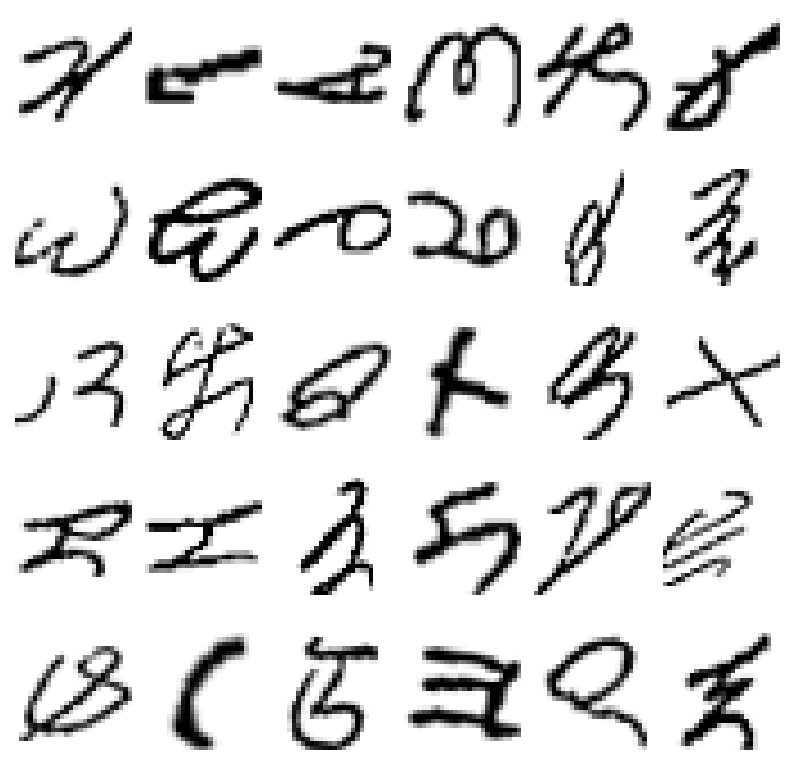

In [23]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precisión del conjunto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))

# Cargar el conjunto de prueba
test_data = pd.read_csv('/content/prueba.csv')
test_data = test_data.to_numpy()
X_test, y_test = test_data[:, 1:], test_data[:, 0]
y_test[y_test == 24] = 0

# Seleccionar aleatoriamente 30 filas del conjunto de prueba
num_muestras = 30
rand_indices_test = np.random.choice(X_test.shape[0], num_muestras, replace=False)

# Obtener los datos seleccionados
X_test_seleccionado = X_test[rand_indices_test, :]
y_test_seleccionado = y_test[rand_indices_test]

# Mostrar la forma de los datos seleccionados
print(X_test_seleccionado.shape)
print(X_test_seleccionado.shape)
print(y_test_seleccionado)
# Realizar predicciones en los 30 datos seleccionados
pred_test_seleccionado = predictOneVsAll(all_theta, X_test_seleccionado)
  #datos verdaderos selecionados
print(pred_test_seleccionado)  # Las predicciones


# Visualizar algunos ejemplos de los 30 datos seleccionados
displayData(X_test_seleccionado)